In [2]:
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준: 맑은고딕)
matplotlib.rc('font', family='Malgun Gothic')

# 마이너스 기호 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False


=== 분류모델 성능평가 ===
              precision    recall  f1-score   support

           0       0.40      0.30      0.34       193
           1       0.78      0.88      0.82      1162
           2       0.42      0.30      0.35       384

    accuracy                           0.69      1739
   macro avg       0.53      0.49      0.50      1739
weighted avg       0.65      0.69      0.67      1739



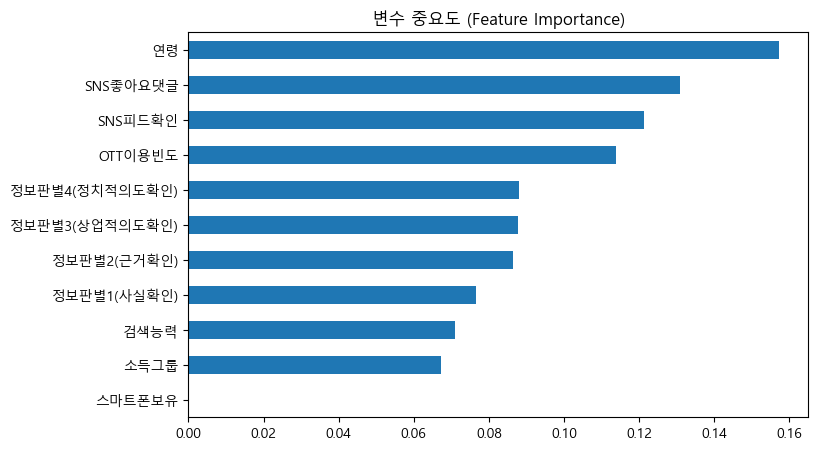

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기 (라벨 포함 최종본)
df = pd.read_csv("p24_final_labeled.csv", encoding='utf-8-sig')
df = df.dropna(subset=['소외군라벨'])  # 라벨 결측 제거

# 2️⃣ X, y 설정
X = df[[
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    '스마트폰보유', '소득그룹', '연령'
]]
y = df['소외군라벨']

# 3️⃣ 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ 랜덤포레스트 분류모형 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5️⃣ 예측 및 평가
y_pred = model.predict(X_test)
print("=== 분류모델 성능평가 ===")
print(classification_report(y_test, y_pred))

# 6️⃣ 변수 중요도 시각화
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh')
plt.title("변수 중요도 (Feature Importance)")
plt.gca().invert_yaxis()
plt.show()


In [6]:
pip install imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------------------------------------- 238.4/238.4 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\windo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


=== 불균형 보정 후 분류모델 성능 ===
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       193
           1       0.80      0.83      0.81      1162
           2       0.40      0.33      0.36       384

    accuracy                           0.67      1739
   macro avg       0.53      0.53      0.53      1739
weighted avg       0.67      0.67      0.67      1739



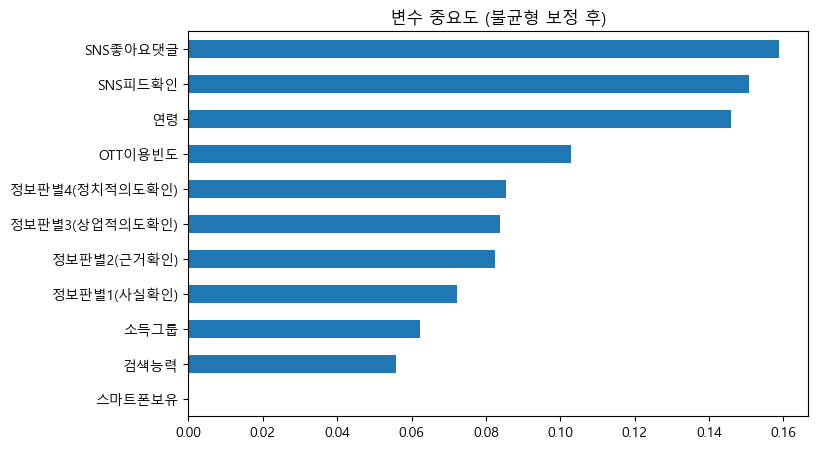

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# 1️⃣ 데이터 불러오기
df = pd.read_csv("p24_final_labeled.csv", encoding='utf-8-sig')
df = df.dropna(subset=['소외군라벨'])

# 2️⃣ X, y 설정
X = df[[
    '검색능력', '정보판별1(사실확인)', '정보판별2(근거확인)',
    '정보판별3(상업적의도확인)', '정보판별4(정치적의도확인)',
    'SNS피드확인', 'SNS좋아요댓글', 'OTT이용빈도',
    '스마트폰보유', '소득그룹', '연령'
]]
y = df['소외군라벨']

# 3️⃣ Train-Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ SMOTE 오버샘플링 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train.dropna(), 
    y_train[X_train.dropna().index]
)

# 5️⃣ 랜덤포레스트 (클래스 가중치 balanced 적용)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# 6️⃣ 예측 및 평가
y_pred = model.predict(X_test)
print("=== 불균형 보정 후 분류모델 성능 ===")
print(classification_report(y_test, y_pred))

# 7️⃣ 변수 중요도 시각화
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importance.plot(kind='barh')
plt.title("변수 중요도 (불균형 보정 후)")
plt.gca().invert_yaxis()
plt.show()
